<a href="https://colab.research.google.com/github/Mariana-zy/SyS-2025-2S/blob/main/Parcial1_ProgramacionEjercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parcial 1: Señales y Sistemas**

Ejercicio 1:


In [ ]:
# Distancia entre 2 señales

import sympy as sym

# Definir simbolos -> t: tiempo, T: Periodo, AyB: amplitudes, nym: armónicos
t, T, A, B = sym.symbols('t T A B', real = True, positive = True)   # realypositive = True -> valores en R+
n, m = sym.symbols('n m', real = True, integer=True)   # integer -> Permite al sympy usar identidades
w0 = 2*sym.pi/T   # w0: Frecuencia angular fundamental

# Definir señales
x1 = A*sym.exp(-sym.I*n*w0*t)   # sim.I (sympy) = j (numpy)
x2 = B*sym.exp(sym.I*m*w0*t)

# Calcular Potencia de cada señal
Px1 = (1/T)*sym.integrate(x1*sym.conjugate(x1), (t, 0, T))   # integrate -> integra
Px2 = (1/T)*sym.integrate(x2*sym.conjugate(x2), (t, 0, T))   # conjugate -> conjugado
 # (variable, inicio, fin)

# Calcular cruzado 1y2
C12 = (-2/T)*sym.integrate(x1*sym.conjugate(x2), (t, 0, T))
C12_simpl = sym.simplify(C12)   # simplify -> ayuda a reducir terminos

sym.sqrt(Px1 + Px2 + C12_simpl)





sqrt(A**2 + B**2 + Piecewise((0, Ne(m, -n)), (-2*A*B, True)))

Ejercicio 2:

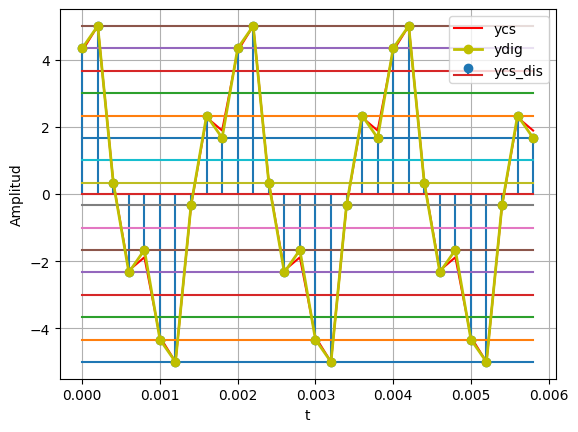

In [ ]:
#Ejemplo de señal despues de cero y pendiente y discretización

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

# crear función en python
def my_ceropen(x, ymin=-5, ymax=5):   # en general se pueden deefinir valores por defecto
  '''
  Código base paa simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min y max después de cero y pendiente
  '''
  xmax = max(x)   # x.max()
  xmin = min(x)   # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

# funcion cuantización punto a punto
def my_cuantizador(yn, vc):   # yn punto a # cuantizar, vq vector de estados
  Ne = vc.shape[0]   # tamaño de vector de estados
  dn = cdist(yn.reshape(-1, 1), vc.reshape(-1, 1))   # distancia yn a vector estados, reshape(-1, 1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn)   # posición distancia min
  return vc[ind]

Fs = 5000   # Frecuencia ejercicio
Ts = 1/Fs
T = 1 / 500   # periodo cuasiperiódica
t = np.arange(0, 3*T, Ts)   # simulando discretización
w1 = 1000*np.pi
w2 = 3000*np.pi
w3 = 11000*np.pi
x = 3*np.cos(w1*t) + 5*np.sin(w2*t) + 10*np.cos(w3*t)

rmin = -5
rmax = 5
ycs = my_ceropen(x, ymin=-5, ymax=5)
# recorrer vector cero y spam discretizado para cuantizar
numb = 4
ve = np.linspace(rmin, rmax, 2**numb)
for i in range(ycs.shape[0]):
  if i == 0:   #primera muestra
    yc = my_cuantizador(ycs[i], ve)
  else:
    yc = np.append(yc, my_cuantizador(ycs[i], ve))   # apilar datos cuantizando si i>0

#graficar señales

plt.plot(t, ycs, c='r', label='ycs')   #cs continua
plt.stem(t, yc, label='ycs_dis')   #cs discreta

#estados de cuantización

for v in ve:
  plt.plot(t,v*np.ones(len(t)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(t, yc, c='y', marker='o', label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

Ejercicio 3:

In [ ]:
# Demostración coeficientes de Fourier a partir de x"(t)

import sympy as sp
from IPython.display import display, Math

# Definición de variables
t, ti, tf, n, w0 = sp.symbols('t t_i t_f n w_0', real=True)
x = sp.Function('x')(t)

# Segunda derivada
x_dd = sp.diff(x, (t, 2))

# Definición de Cn
Cn = (1 / ((ti - tf) * n**2 * w0**2)) * sp.Integral(x_dd * sp.exp(-sp.I * n * w0 * t), (t, ti, tf))

# Separación de partes reales e imaginarias
Re_Cn = (1 / ((ti - tf) * n**2 * w0**2)) * sp.Integral(x_dd * sp.cos(n * w0 * t), (t, ti, tf))
Im_Cn = -(1 / ((ti - tf) * n**2 * w0**2)) * sp.Integral(x_dd * sp.sin(n * w0 * t), (t, ti, tf))

# Coeficientes trigonométricos
a_n = 2 * Re_Cn
b_n = -2 * Im_Cn

# Mostrar los resultados con formato LaTeX
display(Math(r"C_n = " + sp.latex(Cn)))
display(Math(r"C_n = " + sp.latex(Re_Cn) + " - j" + sp.latex(-Im_Cn)))
display(Math(r"a_n = 2\,\mathrm{Re}\{C_n\} = " + sp.latex(a_n)))
display(Math(r"b_n = -2\,\mathrm{Im}\{C_n\} = " + sp.latex(b_n)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Ejercicio 4:

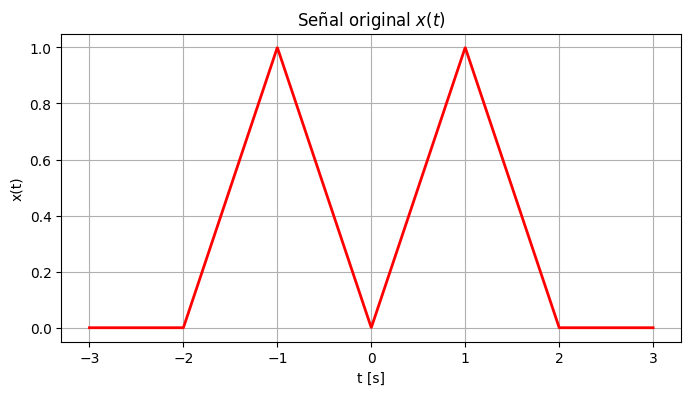

In [3]:
# Espectro de Fourier

# Importación de librerías

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore")

# Parámetros de la señal

A = 1.0       # Amplitud máxima de la señal
d1 = 1.0      # Semibase del triángulo interno
d2 = 2.0      # Semibase total (ancho mayor del trapecio)
T = 6.0       # Periodo de la señal (se repite cada T segundos)
omega0 = 2 * np.pi / T   # Frecuencia angular fundamental (ω0 = 2π/T)

# Pensinetes y saltos de la derivada

m1 = A / (d2 - d1)
m2 = -A / d1
t_points = np.array([-d2, -d1, 0.0, d1, d2])
jumps = np.array([m1, m2 - m1, 2*A/d1, -A*(1/d1 + 1/(d2 - d1)), m1])


# Cáculo de coeficientes de Fourier (vectorizado)

n = np.arange(-20, 21)
Yn = (1/T) * np.sum(jumps[:, None] * np.exp(-1j * n * omega0 * t_points[:, None]), axis=0)
Xn = np.where(n == 0, A * d2 / T, -Yn / ((n * omega0)**2))


# Construcción de la señal original x(t)

N = 2000
t = np.linspace(-T/2, T/2, N)
x = np.zeros_like(t)

# Tramos de la grafica

mask = (t >= -d2) & (t < -d1)
x[mask] = m1 * (t[mask] + d2)

mask = (t >= -d1) & (t < 0)
x[mask] = A + m2 * (t[mask] + d1)

mask = (t >= 0) & (t < d1)
x[mask] = (A / d1) * t[mask]

mask = (t >= d1) & (t < d2)
x[mask] = A - (A / (d2 - d1)) * (t[mask] - d1)

# Gráfica de la señal original

plt.figure(figsize=(8,4))
plt.plot(t, x, 'r', linewidth=2)
plt.title('Señal original $x(t)$')
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.grid(True)
plt.show()

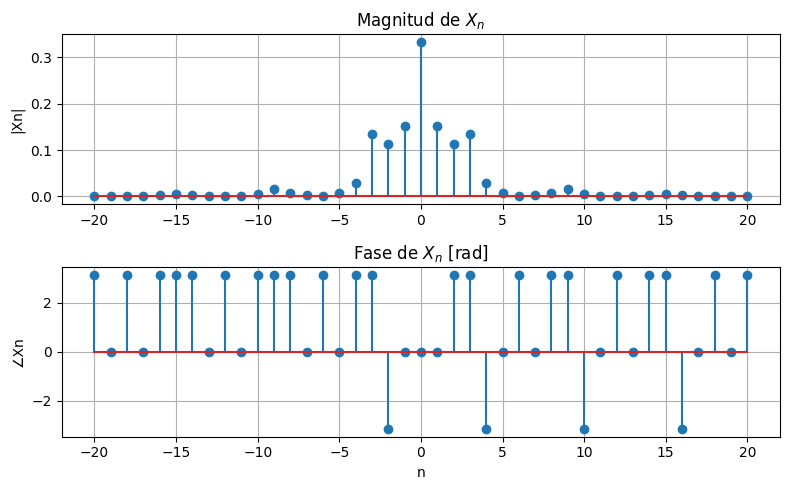

In [4]:
# Espectro de la serie de Fourier

plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
plt.stem(n, np.abs(Xn))
plt.title('Magnitud de $X_n$')
plt.ylabel('|Xn|')
plt.grid()

plt.subplot(2,1,2)
plt.stem(n, np.angle(Xn))
plt.title('Fase de $X_n$ [rad]')
plt.xlabel('n')
plt.ylabel('∠Xn')
plt.grid()

plt.tight_layout()
plt.show()

In [17]:
# Reconstrucción interactiva

def reconstruir(Na=1):
    """
    Reconstruye la señal con Na armónicos y muestra el error relativo Er.
    """
    # Selección de armónicos de -Na a +Na
    ind = np.where(np.abs(n) <= Na)[0]

    # Reconstrucción de la señal
    xe = np.sum(Xn[ind][:, None] * np.exp(1j * n[ind][:, None] * omega0 * t), axis=0)
    xe = np.real(xe)

    # Cálculo de potencias
    Px = (1 / T) * np.trapz(np.abs(x)**2, t)      # Potencia total original
    Px_rec = (1 / T) * np.trapz(np.abs(xe)**2, t) # Potencia reconstruida

    # Error relativo
    Er = 1 - (Px_rec / Px)

    # Gráfica
    plt.figure(figsize=(8,4))
    plt.plot(t, x, 'r', linewidth=2, label='$x(t)$ (original)')
    plt.plot(t, xe, 'b--', linewidth=1.5, label=f'$x_e(t)$ (N={Na})')
    plt.title(r'Reconstrucción con error $E_r$ = %.2f [%%]' % (100 * Er), fontsize=14)
    plt.xlabel('t [s]')
    plt.ylabel('x(t)')
    plt.grid(True)
    plt.legend()
    plt.show()


interact(reconstruir, Na=(1, len(n)//2, 1));

interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…